In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime

In [3]:
log = pm4py.read_xes('./BPI_Challenge_2012.xes.gz')
df = pm4py.convert_to_dataframe(log)

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:21<00:00, 600.52it/s]


In [4]:
df.columns.tolist()

['org:resource',
 'lifecycle:transition',
 'concept:name',
 'time:timestamp',
 'case:REG_DATE',
 'case:concept:name',
 'case:AMOUNT_REQ']

In [5]:
print('DataFrame size: {}'.format(len(df)))
print('DataFrame without nulls size: {}'.format(len(df.dropna())))

DataFrame size: 262200
DataFrame without nulls size: 244190


In [6]:
df.describe()

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
count,244190,262200,262200,262200,262200,262200,262200
unique,68,3,24,248189,13087,13087,631
top,112,COMPLETE,W_Completeren aanvraag,2012-01-05 10:01:25.057000+01:00,2011-11-15 13:42:45.592000+01:00,185548,5000
freq,45687,164506,54850,4,175,175,32988


In [7]:
df_time_event = df[['time:timestamp', 'concept:name', 'case:concept:name']]

df_time_event.describe()

,time:timestamp,concept:name,case:concept:name
count,262200,262200,262200
unique,248189,24,13087
top,2012-01-05 10:01:25.057000+01:00,W_Completeren aanvraag,185548
freq,4,54850,175


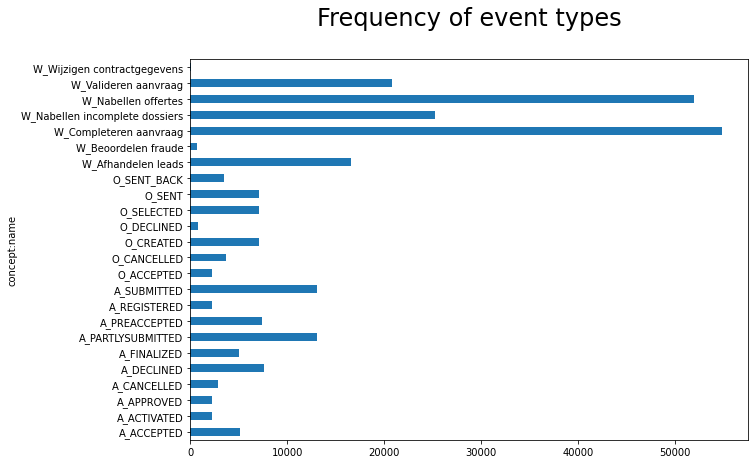

In [8]:
counts = df_time_event.sort_values(by='concept:name', ascending=False).groupby(by='concept:name')['concept:name'].count()
plt.title('Frequency of event types\n', fontdict={'fontsize': 24});
counts.plot.barh(figsize=(10, 7));